In [26]:
%matplotlib inline
from config_calc import *
import grid_tools

from collections import OrderedDict

import cesm_orcas_sci as cesm
import cam
import gv
import metpy.calc as mcalc

#import cmocean
import matplotlib.pyplot as plt

In [59]:
case = 'bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004'

droot = os.path.join(os.path.dirname(gv.flight_file[0]),'..','cesm_flight_data')

data = {}
for i,flight in enumerate(gv.flight):
    file_in = '.'.join([case,os.path.basename(gv.flight_file[i])])
    file_in = os.path.join(droot,file_in)
    data[flight] = xr.open_dataset(file_in)
    
data['ORCASrf01']

<xarray.Dataset>
Dimensions:  (time: 2723)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-15T12:57:26.000000086 ...
Data variables:
    O2_OCN   (time) float64 ...
    PS       (time) float64 ...
    PBLH     (time) float64 ...
    CO2      (time) float64 ...
    CO2_FFF  (time) float64 ...
    PSL      (time) float64 ...
    Q        (time) float64 ...
    U        (time) float64 ...
    T        (time) float64 ...
    CO2_OCN  (time) float64 ...
    V        (time) float64 ...
    U10      (time) float64 ...
    CO2_LND  (time) float64 ...
    Pm       (time) float64 ...
    OMEGA    (time) float64 ...
    Z3       (time) float64 ...

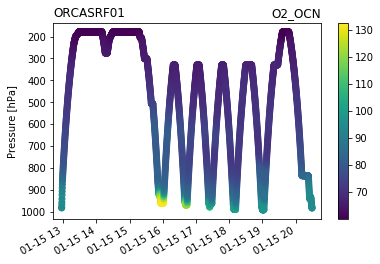

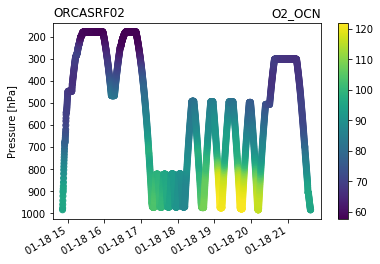

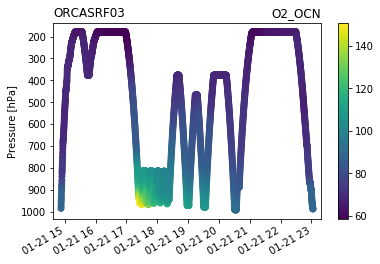

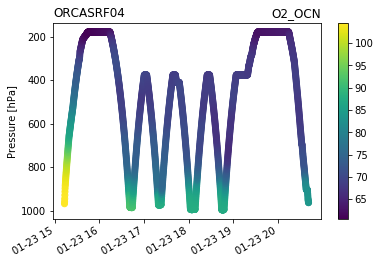

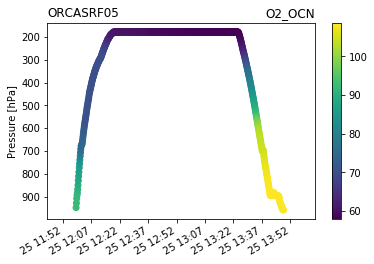

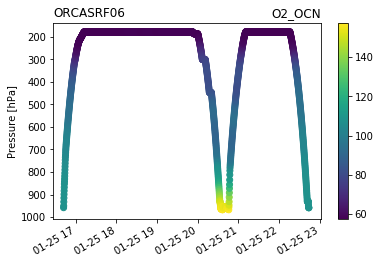

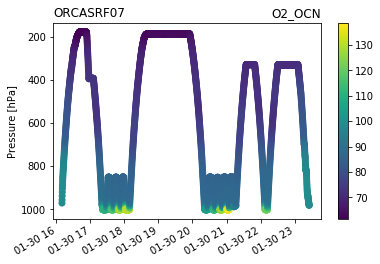

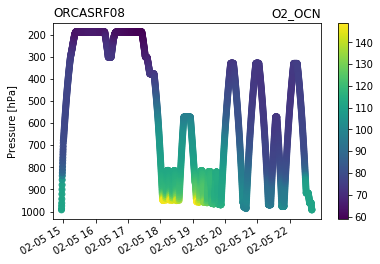

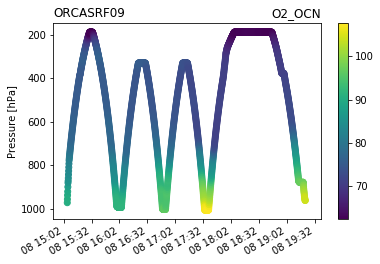

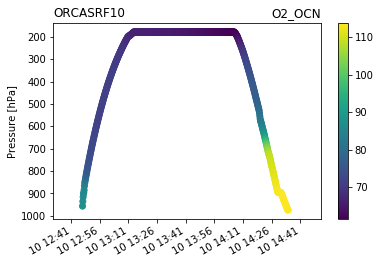

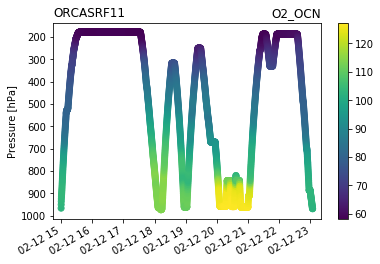

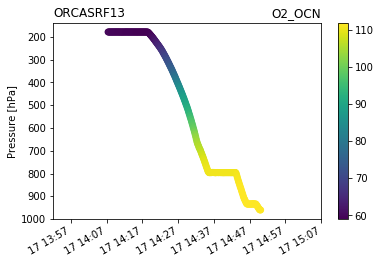

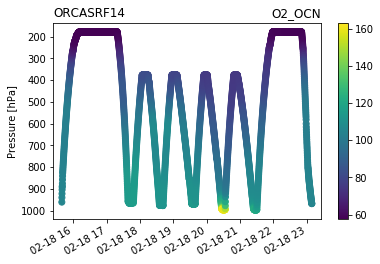

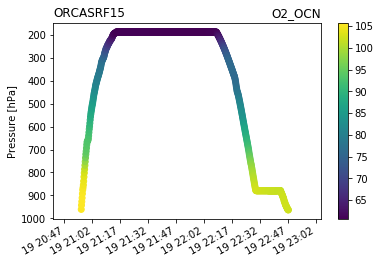

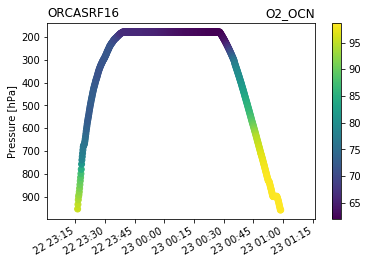

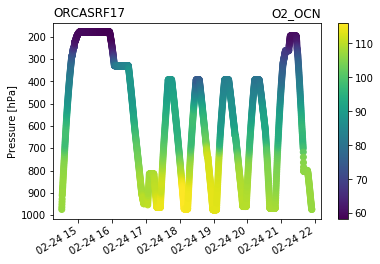

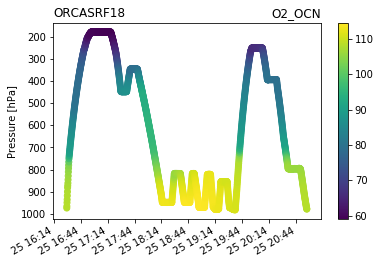

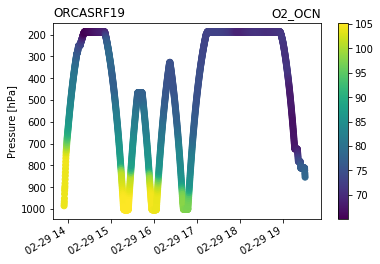

In [60]:
min15 = np.timedelta64(15,'m')
v = 'O2_OCN'
for f in gv.flight:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sc = ax.scatter(data[f].time.values,data[f].Pm,c=data[f][v])

    ax.set_xlim([data[f].time.values[0]-min15,data[f].time.values[-1]+min15])
    ax.set_ylim(ax.get_ylim()[::-1])
    fig.autofmt_xdate()

    ax.set_ylabel('Pressure [hPa]')
    ax.set_title(f.upper(),loc='left')
    ax.set_title(v,loc='right')
    plt.colorbar(sc)

In [61]:
ds = xr.open_dataset('/glade/p/work/mclong/orcas/flt_mdl_col/ORCASrf02-merge10_points_bgeos5.B20TRC5CN.f09_g16.BPRD_orcas_sci.004.cam.h0.CO2_OCN.20070101-20160229.nc')
tracer_def = cesm.trace_gas_tracers(case)
ds

<xarray.Dataset>
Dimensions:           (time: 2452)
Coordinates:
  * time              (time) datetime64[ns] 2016-01-18T14:51:39.000000022 ...
Data variables:
    PSXC              (time) float64 ...
    GGLON             (time) float64 ...
    GGLAT             (time) float64 ...
    GGALT             (time) float64 ...
    DISTANCE          (time) float64 ...
    CO2_OCN_b13geos5  (time) float64 ...
Attributes:
    source_timestamp:  source file was last modified: 2017-03-16 22:58:16.000...
    source:            converted from /glade/p/work/mclong/orcas/fltdata-merg...
    history:           Fri May 26 15:33:35 2017: ncks -d time,11830,14281 /gl...
    NCO:               "4.5.5"

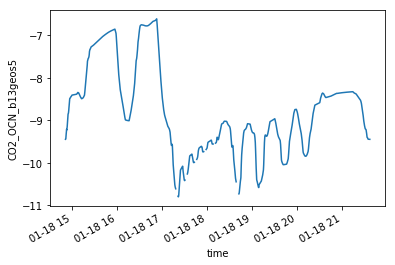

In [62]:
ds.CO2_OCN_b13geos5.values = tracer_def['CO2_OCN']['convert'](ds.CO2_OCN_b13geos5.values)
ds.CO2_OCN_b13geos5.plot()

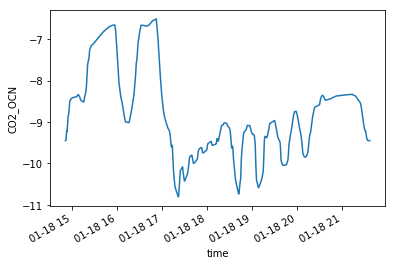

In [63]:
f = 'ORCASrf02'
data[f].CO2_OCN.plot()

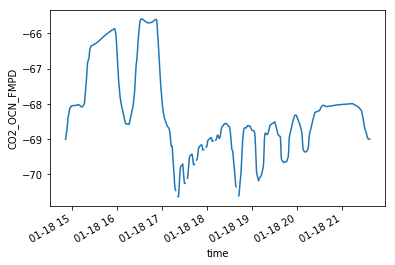

In [58]:
ds = xr.open_dataset('/glade/p/work/mclong/orcas/gv_merged_data/ORCASrf02.merge10.20170526.nc')
ds.CO2_OCN_FMPD.plot()

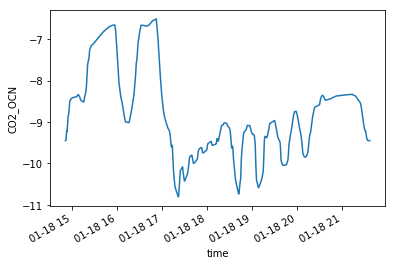

In [65]:
data[f].CO2_OCN.plot()

In [23]:
 np.issubdtype(data[f].time.dtype, np.datetime64)

True

In [ ]:
d